# Library

In [ ]:
# data processing tools
import pandas as pd
import numpy as np
from numpy import mean
from numpy import std
from math import sqrt
import itertools
from collections import Counter
import plotly.express as px

# model tools
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats
from scipy.stats import norm
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, LassoLarsCV, LassoLarsIC
from sklearn.svm import SVR
from sklearn.feature_selection import RFECV
from sklearn.model_selection import cross_val_score, RepeatedKFold, train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import neighbors
import xgboost as xgb

# NLP tools
import spacy
import re
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Visualization tools
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

# Preprocessing

In [ ]:
#mount you google drive environment
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#This is my google drive path, so you need to create this path on your drive or PC to run this code.
path = '/content/drive/MyDrive/Colab Notebooks/CSCE5380/Austin Housing/'
files = path+'austinHousingData.csv'
Austin=pd.read_csv(files)

Austin

,zpid,city,streetAddress,zipcode,description,latitude,longitude,propertyTaxRate,garageSpaces,hasAssociation,hasCooling,hasGarage,hasHeating,hasSpa,hasView,homeType,parkingSpaces,yearBuilt,latestPrice,numPriceChanges,latest_saledate,latest_salemonth,latest_saleyear,latestPriceSource,numOfPhotos,numOfAccessibilityFeatures,numOfAppliances,numOfParkingFeatures,numOfPatioAndPorchFeatures,numOfSecurityFeatures,numOfWaterfrontFeatures,numOfWindowFeatures,numOfCommunityFeatures,lotSizeSqFt,livingAreaSqFt,numOfPrimarySchools,numOfElementarySchools,numOfMiddleSchools,numOfHighSchools,avgSchoolDistance,avgSchoolRating,avgSchoolSize,MedianStudentsPerTeacher,numOfBathrooms,numOfBedrooms,numOfStories,homeImage
0,111373431,pflugerville,14424 Lake Victor Dr,78660,"14424 Lake Victor Dr, Pflugerville, TX 78660 i...",30.430632,-97.663078,1.98,2,True,True,True,True,False,False,Single Family,2,2012,305000.0,5,2019-09-02,9,2019,"Coldwell Banker United, Realtors - South Austin",39,0,5,2,1,3,0,1,0,6011.0,2601.0,1,0,1,1,1.266667,2.666667,1063,14,3.0,4,2,111373431_ffce26843283d3365c11d81b8e6bdc6f-p_f...
1,120900430,pflugerville,1104 Strickling Dr,78660,Absolutely GORGEOUS 4 Bedroom home with 2 full...,30.432673,-97.661697,1.98,2,True,True,True,True,False,False,Single Family,2,2013,295000.0,1,2020-10-13,10,2020,Agent Provided,29,0,1,2,0,0,0,0,0,6185.0,1768.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,4,1,120900430_8255c127be8dcf0a1a18b7563d987088-p_f...
2,2084491383,pflugerville,1408 Fort Dessau Rd,78660,Under construction - estimated completion in A...,30.409748,-97.639771,1.98,0,True,True,False,True,False,False,Single Family,0,2018,256125.0,1,2019-07-31,7,2019,Agent Provided,2,0,4,1,0,1,0,0,0,7840.0,1478.0,0,2,1,1,1.200000,3.000000,1108,14,2.0,3,1,2084491383_a2ad649e1a7a098111dcea084a11c855-p_...
3,120901374,pflugerville,1025 Strickling Dr,78660,Absolutely darling one story home in charming ...,30.432112,-97.661659,1.98,2,True,True,True,True,False,False,Single Family,2,2013,240000.0,4,2018-08-08,8,2018,Agent Provided,9,0,0,2,0,0,0,0,0,6098.0,1678.0,1,0,1,1,1.400000,2.666667,1063,14,2.0,3,1,120901374_b469367a619da85b1f5ceb69b675d88e-p_f...
4,60134862,pflugerville,15005 Donna Jane Loop,78660,Brimming with appeal & warm livability! Sleek ...,30.437368,-97.656860,1.98,0,True,True,False,True,False,False,Single Family,0,2002,239900.0,3,2018-10-31,10,2018,Agent Provided,27,0,0,1,0,0,0,0,0,6708.0,2132.0,1,0,1,1,1.133333,4.000000,1223,14,3.0,3,2,60134862_b1a48a3df3f111e005bb913873e98ce2-p_f.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15166,29512934,austin,905 Silcantu Dr,78748,Not for rent!\n\nBeautiful one story home in T...,30.161997,-97.816345,1.98,6,False,True,True,True,False,True,Single Family,6,1986,330000.0,1,2020-12-10,12,2020,Agent Provided,49,0,3,2,4,0,0,0,0,6534.0,1234.0,1,0,1,1,0.900000,3.333333,1424,14,2.0,3,1,29512934_ff9b6eefa7e2eb4e9ef983da13a23098-p_f.jpg
15167,241937773,austin,1413 Waterloo Shore Ln UNIT 12,78741,This contemporary three-story detached condo h...,30.240223,-97.772835,1.98,2,True,True,True,True,True,True,Single Family,2,2016,550000.0,1,2020-12-16,12,2020,Agent Provided,32,1,5,2,2,1,0,0,0,2439.0,1888.0,1,0,1,1,1.900000,6.666667,1226,16,4.0,3,3,241937773_66d3e483bd783eac5a52ff5f938d2a2e-p_f...
15168,29473281,austin,2206 S 3rd St,78704,Original bungalow with a modern addition. Larg...,30.244835,-97.761124,1.98,2,False,True,True,True,False,False,Single Family,2,1936,875000.0,7,2021-01-27,1,2021,ABOR,20,0,3,3,0,0,0,0,0,9408.0,1524.0,1,0,1,1,0.800000,5.000000,889,13,3.0,3,2,29473281_9e90ec4652c4b3b6592a7fdd09f1ea6d-p_f.jpg
15169,29392029,austin,2000 Chestnut Ave,78722,So many options at this address in the eclecti...,30.281569,-97.717789,1.98,0,False,True,False,True,False,False,MultiFamily,0,1968,420000.0,5,2019-08-07,8,2019,Broker Provided,15,0,3,1,0,0,0,0,0,6098.0,6068.0,1,0,1,1,1.300000

In [ ]:
Austin.dtypes

zpid                            int64
city                           object
streetAddress                  object
zipcode                         int64
description                    object
latitude                      float64
longitude                     float64
propertyTaxRate               float64
garageSpaces                    int64
hasAssociation                   bool
hasCooling                       bool
hasGarage                        bool
hasHeating                       bool
hasSpa                           bool
hasView                          bool
homeType                       object
parkingSpaces                   int64
yearBuilt                       int64
latestPrice                   float64
numPriceChanges                 int64
latest_saledate                object
latest_salemonth                int64
latest_saleyear                 int64
latestPriceSource              object
numOfPhotos                     int64
numOfAccessibilityFeatures      int64
numOfApplian

##  Data Cleaning

In [ ]:
def remove_unused_cols(df):
  """
  Removes 'numOfCommunityFeatures', 'numOfWaterfrontFeatures'

  Arg: df: DataFrame

  Return : DataFrame without those columns that listed
  """

  df = df.drop(['numOfCommunityFeatures', 'numOfWaterfrontFeatures'], axis = 1)

  return df

In [ ]:
#rename lastestPrice to price
Austin.rename(columns = {'latestPrice' : 'Price'}, inplace = True)
#set up the minimum house's price to 100,000 to avoid the rental price
price = Austin[Austin['Price'] > 100000]

In [ ]:
def reduce_mem_usage(df):
    
    """Code from https://www.mikulskibartosz.name/how-to-reduce-memory-usage-in-pandas/"""
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

    for col in df.columns:
        col_type = df[col].dtype
    if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.uint8).min and c_max < np.iinfo(np.uint8).max:
                    df[col] = df[col].astype(np.uint8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.uint16).min and c_max < np.iinfo(np.uint16).max:
                    df[col] = df[col].astype(np.uint16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.uint32).min and c_max < np.iinfo(np.uint32).max:
                    df[col] = df[col].astype(np.uint32)                    
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
                elif c_min > np.iinfo(np.uint64).min and c_max < np.iinfo(np.uint64).max:
                    df[col] = df[col].astype(np.uint64)
            elif str(col_type)[:5] == 'float':
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
Austin = remove_unused_cols(Austin)

## Data Visualization

<function matplotlib.pyplot.show>

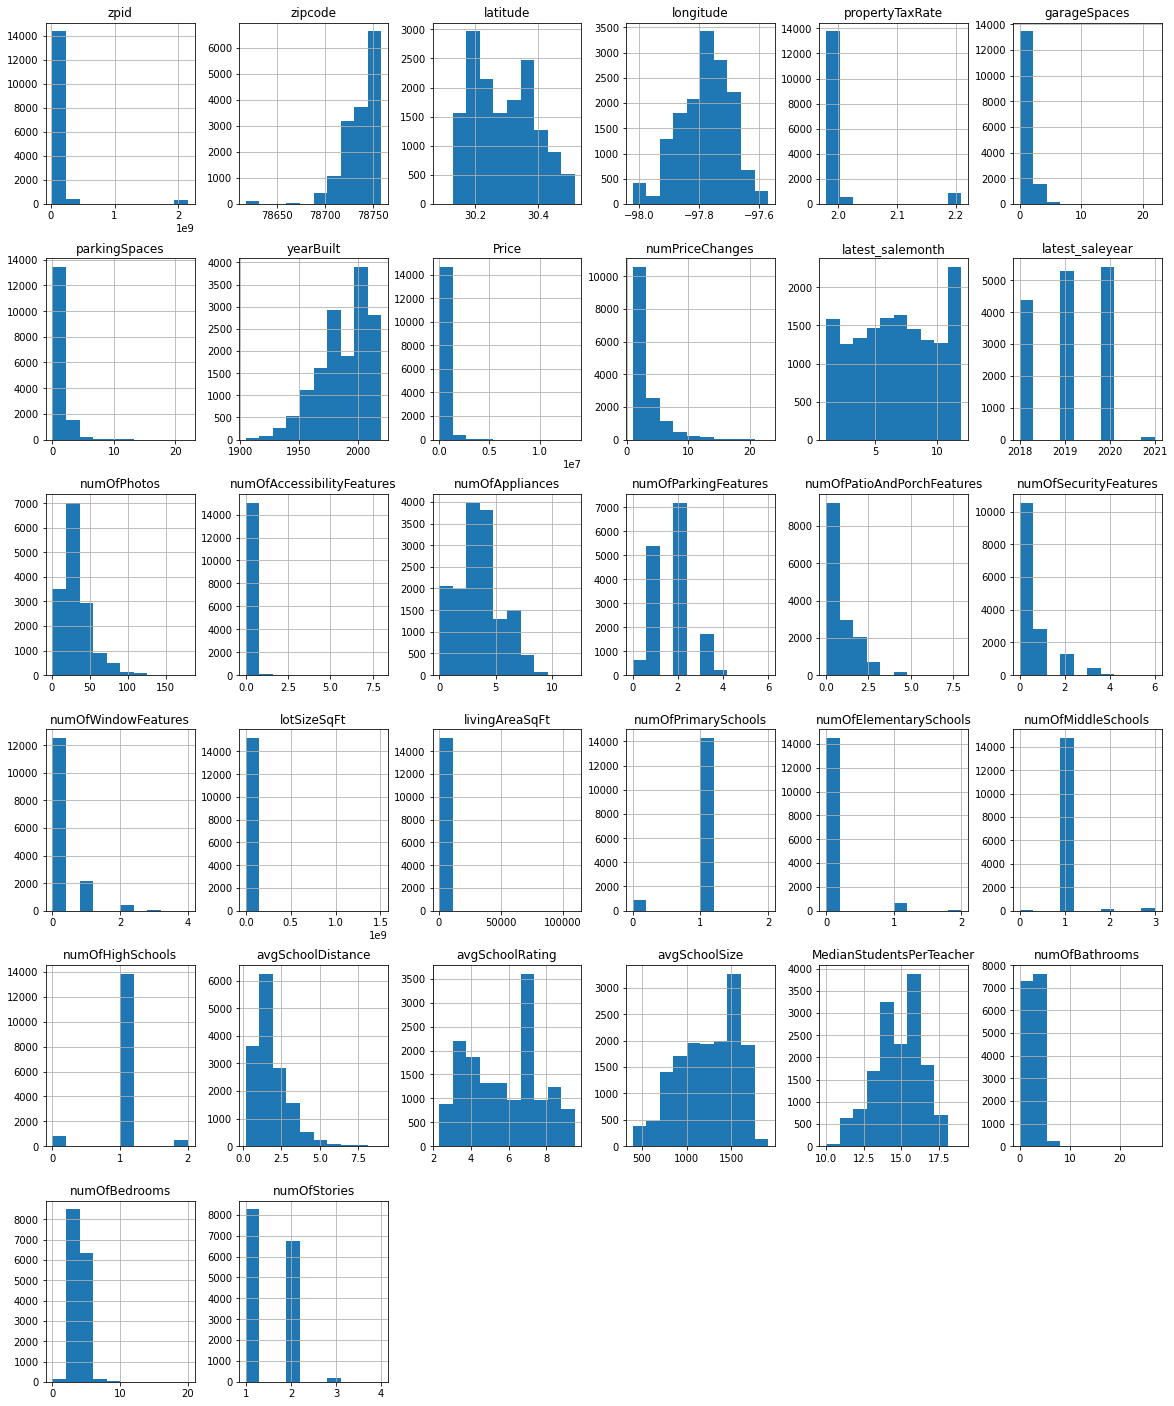

In [ ]:
#show the data of each column in histogram

Austin.hist(figsize=(20, 25))
plt.show

Year Built

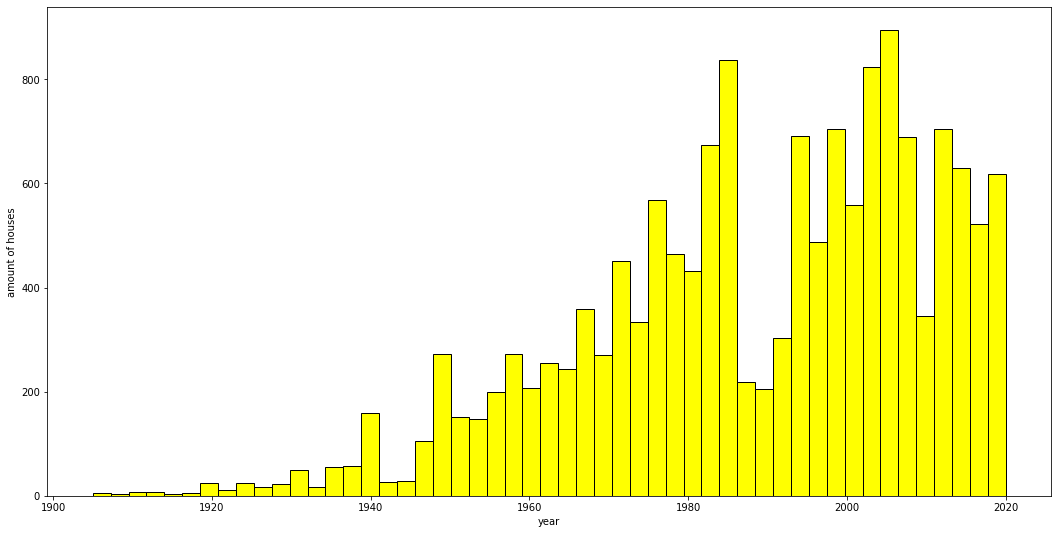

In [ ]:
plt.figure(figsize=(18, 9))
plt.hist(Austin['yearBuilt'], bins=51, edgecolor='black',color='Yellow')
plt.xlabel('year')
plt.ylabel('amount of houses')
plt.show()

House price

In [ ]:
plt.bar(price)

TypeError: ignored

## Show only Latitude and Longitude

In [ ]:
Lat_Long = Austin[["latitude", "longitude"]]
Lat_Long.head()

In [ ]:
from geopy.geocoders import Nominatim
import folium
from folium.plugins import MarkerCluster
geolocator = Nominatim(user_agent="Austin")

In [ ]:
map1 = folium.Map(
    location=[30.40, -97.65],
    tiles='cartodbpositron',
    zoom_start=10
)
#marker_cluster = MarkerCluster("UBER Cluster").add_to(map1)
x = Austin['latitude'][:100].values
y = Austin['longitude'][:100].values

for i in range(100):
  folium.Marker([x[i], y[i]]).add_to(map1)

map1